In [5]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [0]:
import pandas as pd
import seaborn as s
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import io

In [0]:
apples = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))

In [8]:
apples.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


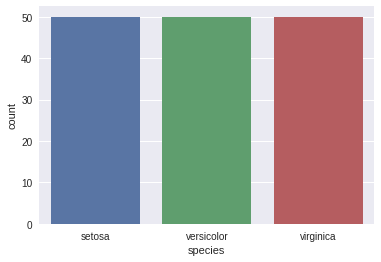

In [9]:
%matplotlib inline
s.countplot(x='species', data=apples)

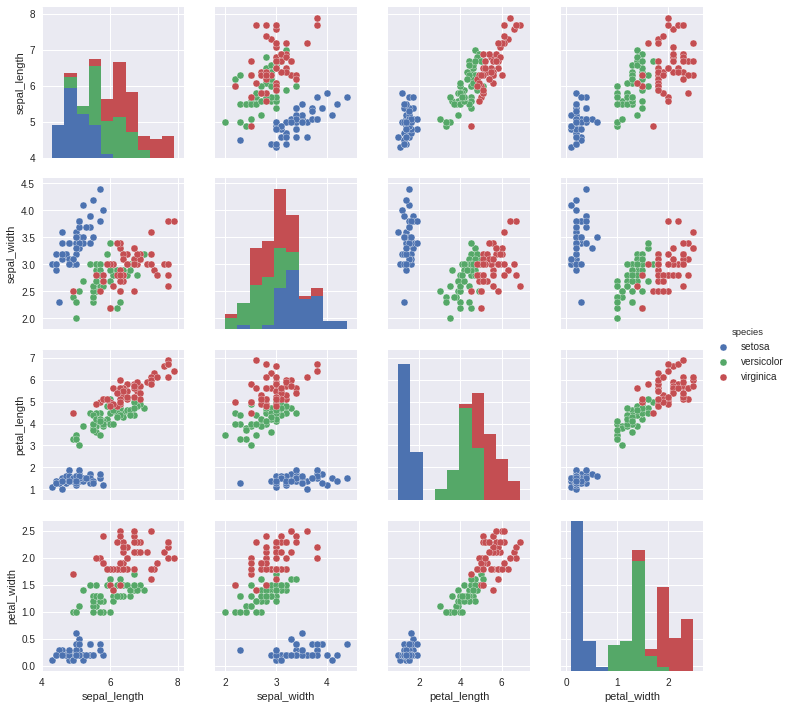

In [10]:
s.pairplot(apples, hue='species', kind='scatter')

In [11]:
scaler = StandardScaler()
scaler.fit(apples.drop('species',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.fit_transform(apples.drop('species', axis = 1))
#Converting Scaled Features to a DataFrame
df_feat = pd.DataFrame(scaled_features, columns = apples.columns[:-1])
df_feat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [0]:
### TEST TRAIN SPLIT
x = df_feat
y = apples['species']
# Using the .as_matrix() methodin order for TensorFlow to accept the data in Numpy array form instead of a pandas series.
x = x.as_matrix()
y = y.as_matrix()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
print("confusion matrix")
rfc_preds = rfc.predict(x_test)
# Create confusion matrix
pd.crosstab(y_test, rfc_preds, rownames=['Actual'], colnames=['Predicted'])


confusion matrix


Predicted,setosa,versicolor,virginica
Actual,,,
setosa,17,0,0
versicolor,0,16,0
virginica,0,3,9


In [24]:
print("Model evaluation\n"+classification_report(y_test,rfc_preds))

Model evaluation
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       0.84      1.00      0.91        16
  virginica       1.00      0.75      0.86        12

avg / total       0.94      0.93      0.93        45

